
\newpage

In [1]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time


# Resolução do Ítem (b)
## Gráfico da Função


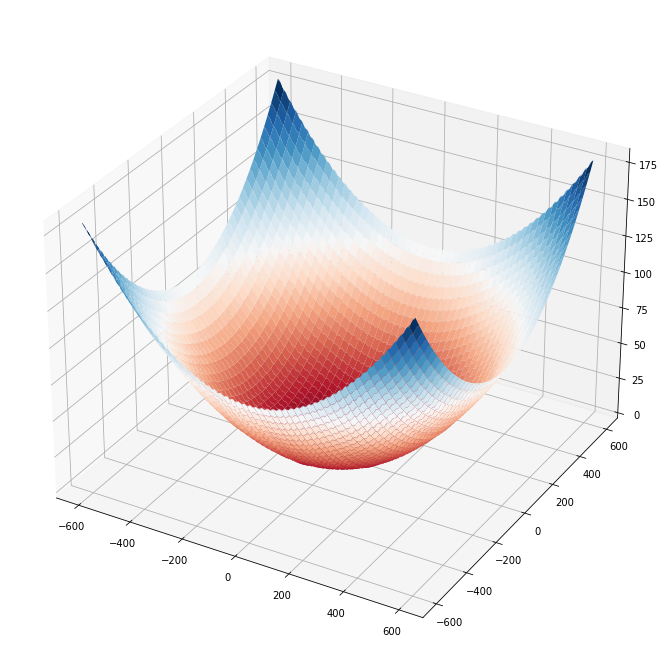

In [2]:
Griewank().graph()

### Evolução Diferencial

In [3]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=50,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Griewank', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 50

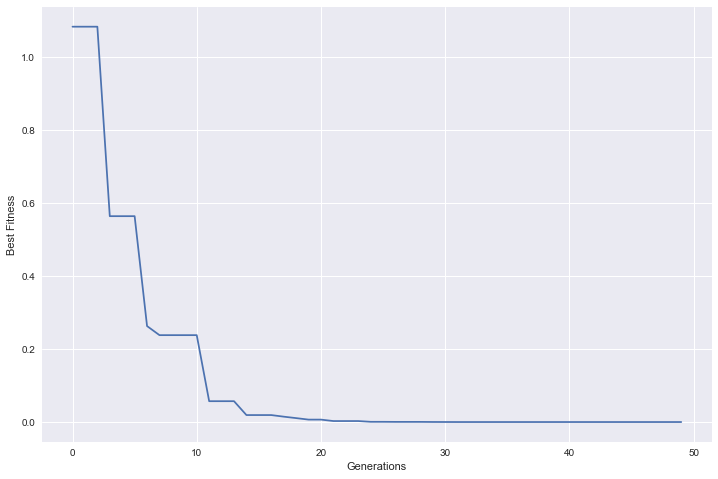

In [4]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [5]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 1.2649420844113024e-10	Q1: 1.3048746017041424e-07	Q2: 0.0006130348929314078	Q3: 0.05707625046647813	Max: 7.409132085633985e-09
0.12861455543410172


In [6]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=50,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Griewank', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 50

In [7]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 2.8553099625424256e-09
Variance: 2.535659459008345e-17
Standard Deviation: 5.035533198190977e-09


In [8]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.3050068219502766
Variance: 0.00744970726953827
Standard Deviation: 0.08631168674946789


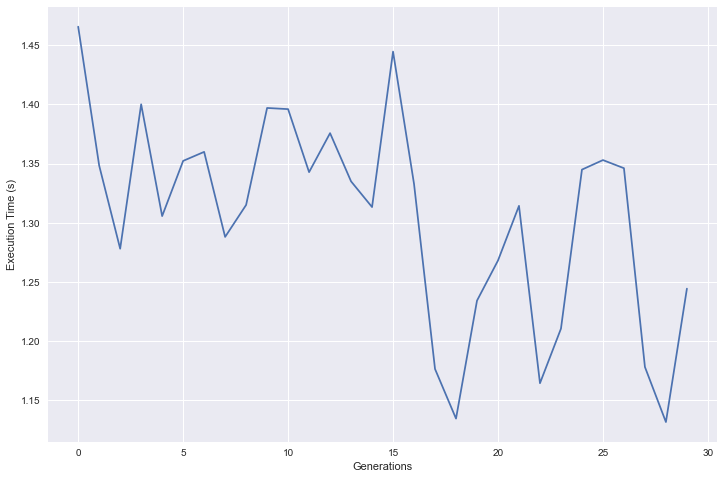

In [9]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### Algorítmos de Estimação de Distribuição

In [22]:
all_best_solutions = []
    
cga = CompactGA(
    ng=100,
    np=50, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=8, 
    evfunc='Griewank'
)
cga.evolve()

all_best_solutions = cga.get_all_best_solutions()

GERAÇÃO: 100

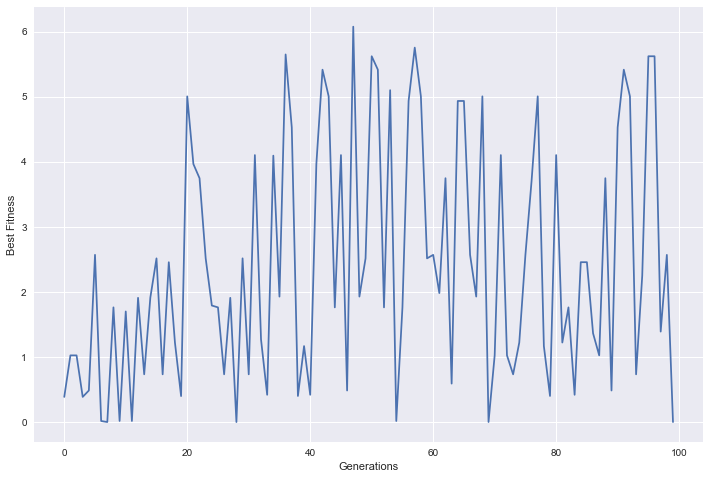

In [23]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [24]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 0.0	Q1: 0.7330948685524388	Q2: 1.920040712294585	Q3: 4.095001853289055	Max: 0.3969475601756888
2.403819265358565


In [25]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=100,
        np=50, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=8, 
        evfunc='Griewank'
    )
    cga.evolve()

    all_best_solutions.append(cga.get_best_solution())
    all_execution_time.append(cga.get_execution_time())

GERAÇÃO: 100

In [26]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.004933671318904779
Variance: 0.0005631359569204784
Standard Deviation: 0.02373048581298913


In [29]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.7580960830052694
Variance: 0.0031858613097850564
Standard Deviation: 0.056443434603017


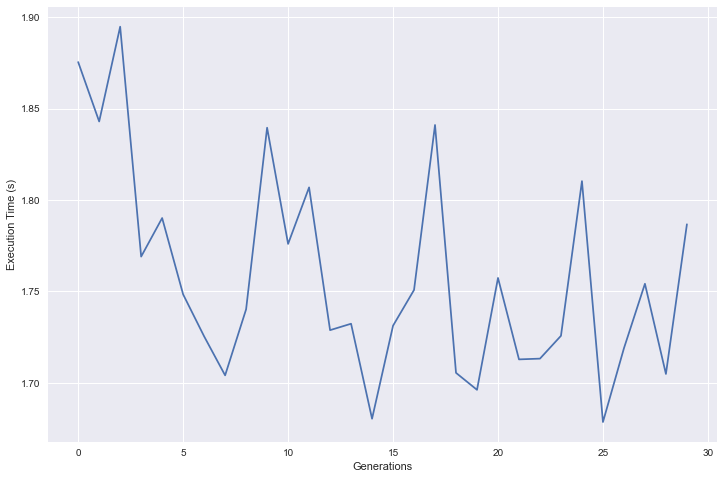

In [30]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Algoritmo Genético

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 1000 gerações.

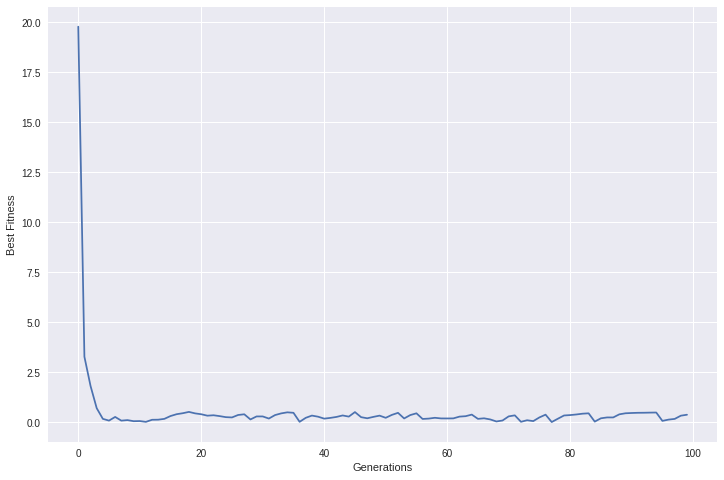

In [ ]:
UB = 32
LB = -32
pop = np.random.uniform(low=LB, high=UB, size=(700,2))
model = ModelGA(
pop,
Ackley().compute, 
"whole arithmetic recombination", 
"uniform mutation",
"fitness proportional selection",
"fitness proportional selection",
0.01,
100,
UB,
LB,
0)
    
ga_alg = GA(model)
stop = time.time();
ga_alg.run(model)
stop = time.time();

x = range(0,100)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "0,16" com um desvio padrão de "0,13" . Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 3,87 s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)

print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 0.16186891044770194
Variance: 0.016926329998450913
Standard Deviation: 0.13010122981144687


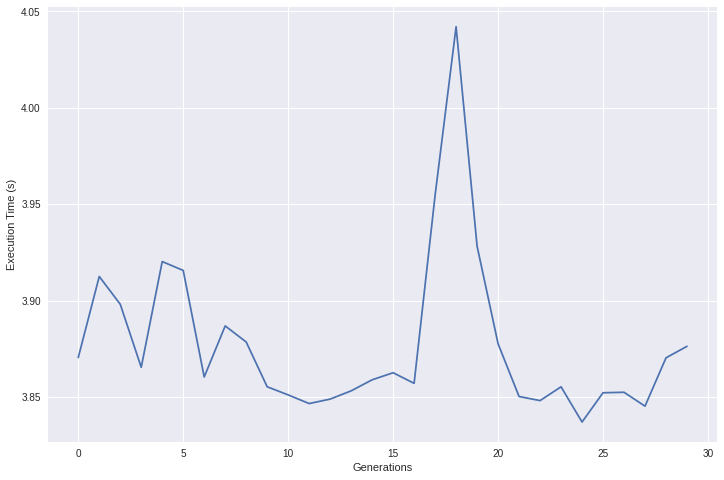

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

## Estratégia de Evolução

Para esse algorítmo utilizou-se um "mu" de 40, um "lambda" de 300, um "sigma" de 2 (o qual muda comforme a regra de 1/5). Ademais, não houve recombinação, a mutação foi "uniform mutation", a seleção de pais foi uniforme e a de filhos foi a "mu,lambda". Abaixo é mostrado a convergência do melhor indivíduo de uma geração, durante as 700 gerações.

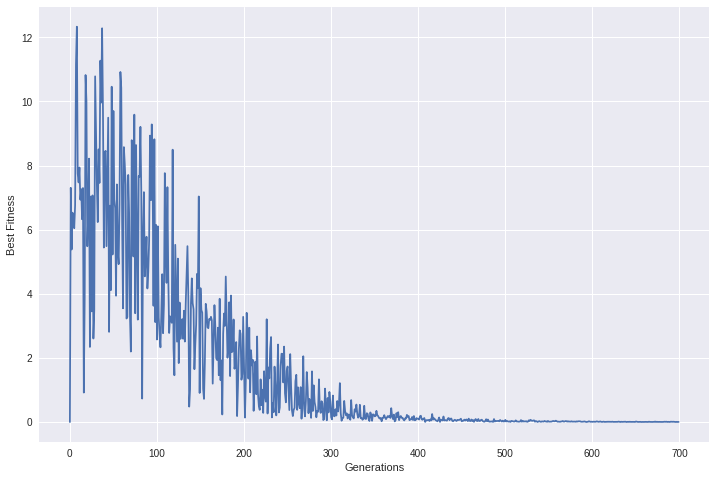

In [ ]:
GENERATIONS = 700;
UB = 32
LB = -32
pop_size = 40
pop = np.random.uniform(low=-32, high=32, size=(pop_size,2))
model = ModelES(
pop,
Ackley().compute,
"uniform mutation",
"mu,lambda",
"random",
2,
300,
40,
10,
GENERATIONS,
UB,
LB,
0)

es_alg = ES(model)

es_alg.run(model)

x = range(0,GENERATIONS)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "8,52e-8" com um desvio padrão de "4,59e-7". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 3.68s.

In [ ]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    es_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

In [ ]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 8.524294369631017e-08
Variance: 2.105345639508586e-13
Standard Deviation: 4.588404558785751e-07


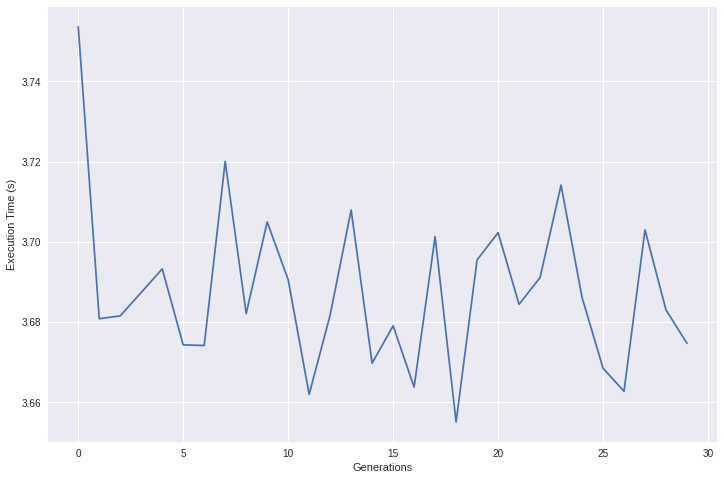

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()